<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Практика" data-toc-modified-id="Практика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Практика</a></span><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ЦПТ для различных распределений</a></span><ul class="toc-item"><li><span><a href="#Сгенерируйте-примеры-из-распределения" data-toc-modified-id="Сгенерируйте-примеры-из-распределения-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Сгенерируйте примеры из распределения</a></span></li><li><span><a href="#Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения" data-toc-modified-id="Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Постройте гистограмму выборки и теоретическую плотность распределения</a></span></li><li><span><a href="#Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок" data-toc-modified-id="Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Оценим распределение выборочного среднего для разных объёмов выборок</a></span></li></ul></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></li></ul></div>

# Практика

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [83]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# cosine_rv = sts.cosine()
# sample = cosine_rv.rvs(100)
# sample
crystalball_rv = sts.crystalball(2,8)
sample = crystalball_rv.rvs(100)
sample

array([-0.44688781, -0.57927129, -3.01351451,  2.25844919,  0.5907883 ,
        0.11984525,  1.57056942,  1.34963616, -1.09866324,  0.64984545,
        0.45190855, -0.98981554, -0.12067958, -0.86412834, -0.88050638,
       -0.57057288,  0.12563184, -0.16247922,  0.98190086, -0.43148713,
       -0.5203464 , -0.4907697 , -1.9845918 ,  0.34541147, -1.05794606,
        1.98795194, -3.66727001,  0.45108732,  1.42663495, -0.11841572,
        0.95333757, -2.06246563, -1.48732141,  0.05309671,  0.43672406,
        1.0924646 , -0.81836716,  1.21669572,  0.07167747,  0.50259621,
        1.27825628,  1.61364963, -0.68916142,  1.69292041,  1.01064006,
        1.32145586,  0.69494939, -0.10792684, -0.62653381, -0.5589811 ,
        0.1158959 , -0.19724755,  0.22263008, -0.76317567, -0.74068531,
        0.48827066, -1.16888947, -1.00207159, -1.24716944, -0.41627885,
       -1.69242564, -2.74721351,  1.09336719,  0.50418264, -1.02036808,
        0.05324135,  0.54745557, -0.18845084, -0.87385576, -1.97

In [37]:
sample.dtype

dtype('float64')

In [38]:
real_mean = crystalball_rv.mean() # настоящее среднее случайной величины
real_mean

-0.028053695655538342

In [39]:
real_var = crystalball_rv.var() # настоящая дисперсия случайной величины
real_var

1.0981660257450563

### Постройте гистограмму выборки и теоретическую плотность распределения

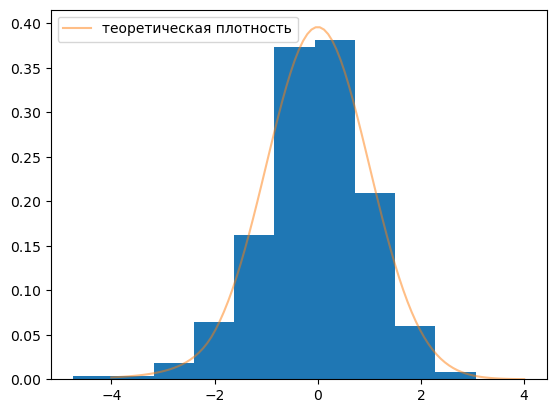

In [40]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = crystalball_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [41]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.05578867872522957
1.0832018927149916


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [98]:
crystalball_rv.mean()

-0.028053695655538342

In [99]:
crystalball_rv.std()

1.047934170520771

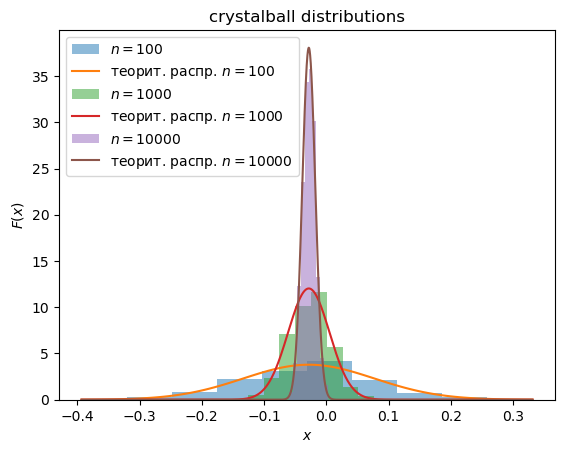

In [140]:
# ваш код тут
crystalball_rv = sts.crystalball(2,8)
min_x, max_x = 0,0
for i in range(2,5):
    n=10**i
    means = []
    for j in range(1000):
        means.append(np.mean(crystalball_rv.rvs(n)))
    plt.hist(means, density=True, label="$n=%s$" % n, alpha=0.5)
    min_x = np.asarray(means).min() if min_x>np.asarray(means).min() else min_x
    max_x = np.asarray(means).max() if max_x<np.asarray(means).max() else max_x
    
    norm_rv = sts.norm(loc=crystalball_rv.mean(), scale=crystalball_rv.std() / np.sqrt(n-1))
    x = np.linspace(min_x,max_x, n)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='теорит. распр. $n=%s$' % n, alpha=1)

plt.title("crystalball distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.legend()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Для выбранного распределения (распределение "Хрустального шара") апроксимация распределения выборочного среднего работает хорошо.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [134]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [135]:
# всего уникальных записей
df['phone number'].nunique()

3333

In [136]:
# ваш код тут
# Среднее значение для тех кто остался
mean_0 = df[df['churn'] == False ]['total day calls'].mean()
count_0 = df[df['churn'] == False ]['phone number'].count()
print(f'осталось {count_0}, среднее значение TDS {mean_0}')
# Среднее значение для тех кто ушел
mean_1 = df[df['churn'] == True ]['total day calls'].mean()
count_1 = df[df['churn'] == True ]['phone number'].count()
print(f'ушло {count_1}, среднее значение TDS {mean_1}')

осталось 2850, среднее значение TDS 100.28315789473685
ушло 483, среднее значение TDS 101.33540372670808


In [129]:
# оставшиеся клиенты
remaining_df =df[df['churn'] == False ].copy() 
remaining_N = remaining_df['phone number'].nunique()
print('''Доверительный интервал для среднего 'total day calls' для оставшихся клиентов 
по ЦПТ, интервальная оценка: {} '''
    .format(sts.norm.interval(confidence=0.95, loc=np.mean(remaining_df['total day calls']), 
    scale=np.std(remaining_df['total day calls'], ddof=1)/np.sqrt(remaining_N-1)) # alternative 'two-sided' only
))
print('''\nДоверительный интервал для среднего 'total day calls' для оставшихся клиентов 
по ЦПТ, методом _zconfint_generic: {} '''
    .format(ssw._zconfint_generic(np.mean(remaining_df['total day calls']),
    np.std(remaining_df['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))
interval_int= list(sts.norm.interval(confidence=0.95, loc=np.mean(remaining_df['total day calls']), 
    scale=np.std(remaining_df['total day calls'], ddof=1)/np.sqrt(remaining_N-1)))
interval_zc= list(ssw._zconfint_generic(np.mean(remaining_df['total day calls']),
    np.std(remaining_df['total day calls'], ddof=1), alpha=0.95, alternative='two-sided'))
if interval_int[1] - interval_int[0] < interval_zc[1] - interval_zc[0]:
    print('''\nДоверительный интервал интервальной оценки меньше, чем доверительный интервал
    полученный методом сводной статистики.''')
elif  interval_int[1] - interval_int[0] > interval_zc[1] - interval_zc[0]:
    print('''\nДоверительный интервал интервальной оценки больше, чем доверительный интервал
    полученный методом сводной статистики.''')
else:
    print('''\nДоверительный интервал интервальной оценки равен доверительному интервалу
    полученному методом сводной статистики.''')

Доверительный интервал для среднего 'total day calls' для оставшихся клиентов 
по ЦПТ, интервальная оценка: (99.55606076109109, 101.0102550283826) 

Доверительный интервал для среднего 'total day calls' для оставшихся клиентов 
по ЦПТ, методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 

Доверительный интервал интервальной оценки меньше, чем доверительный интервал
    полученный методом сводной статистики.


In [137]:
remaining_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [131]:
# ушедшие клиенты
lost_df =df[df['churn'] == True ].copy() 
lost_N = lost_df['phone number'].nunique()
print('''Доверительный интервал для среднего 'total day calls' для ушедших клиентов 
по ЦПТ, интервальная оценка: {} '''
    .format(sts.norm.interval(confidence=0.95, loc=np.mean(lost_df['total day calls']), 
    scale=np.std(lost_df['total day calls'], ddof=1)/np.sqrt(lost_N-1)) # alternative 'two-sided' only
))
print('''\nДоверительный интервал для среднего 'total day calls' для ушедших клиентов 
по ЦПТ, методом _zconfint_generic: {} '''
    .format(ssw._zconfint_generic(np.mean(lost_df['total day calls']),
    np.std(lost_df['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))

interval_int= list(sts.norm.interval(confidence=0.95, loc=np.mean(lost_df['total day calls']), 
    scale=np.std(lost_df['total day calls'], ddof=1)/np.sqrt(lost_N-1)))
interval_zc= list(ssw._zconfint_generic(np.mean(lost_df['total day calls']),
    np.std(lost_df['total day calls'], ddof=1), alpha=0.95, alternative='two-sided'))
if interval_int[1] - interval_int[0] < interval_zc[1] - interval_zc[0]:
    print('''\nДоверительный интервал интервальной оценки меньше, чем доверительный интервал
    полученный методом сводной статистики.''')
elif  interval_int[1] - interval_int[0] > interval_zc[1] - interval_zc[0]:
    print('''\nДоверительный интервал интервальной оценки больше, чем доверительный интервал
    полученный методом сводной статистики.''')
else:
    print('''\nДоверительный интервал интервальной оценки равен доверительному интервалу
    полученному методом сводной статистики.''')

Доверительный интервал для среднего 'total day calls' для ушедших клиентов 
по ЦПТ, интервальная оценка: (99.40866670589261, 103.26214074752355) 

Доверительный интервал для среднего 'total day calls' для ушедших клиентов 
по ЦПТ, методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 

Доверительный интервал интервальной оценки больше, чем доверительный интервал
    полученный методом сводной статистики.


In [138]:
lost_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,417-1488,no,no,0,280.0,113,47.60,...,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True
